In [2]:
#Importing all the necesary libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#loading the dataset
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
df.shape

(200, 4)

Observation:
    
    There are 200 rows and 4 columns in our dataset

In [19]:
#checking for null values
df.isnull().values.any()

False

Observation:
    
    This data set donot have any null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation:
    
    Data have only float datatypes

<AxesSubplot:>

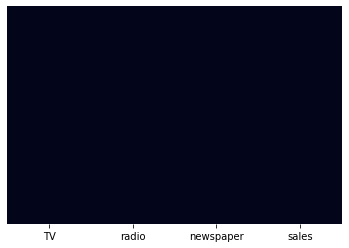

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [25]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [26]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
df_cor=df.corr()
df_cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


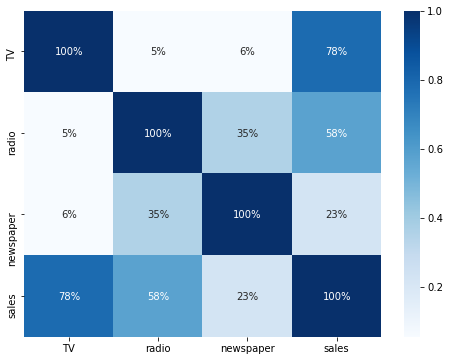

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

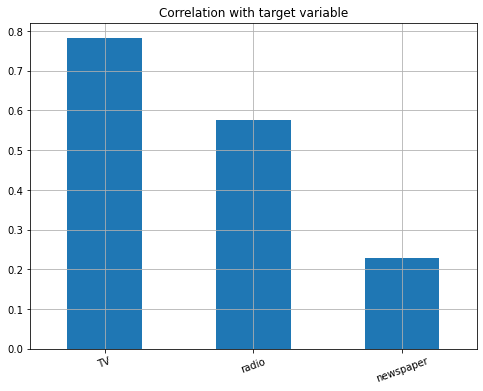

In [35]:
plt.figure(figsize=(8,6))
df.drop('sales',axis=1).corrwith(df['sales']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target variable')

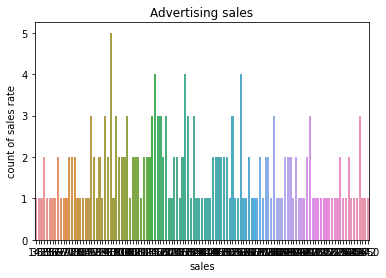

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64


In [40]:
#univariate Analysis
plt.subplots(figsize=(6,4))
sns.countplot(x='sales',data=df)
plt.title('Advertising sales')
plt.xlabel('sales')
plt.ylabel('count of sales rate')
plt.show()

print(df.sales.value_counts())

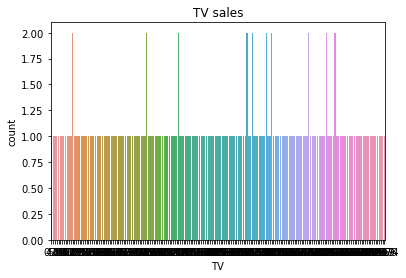

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64


In [42]:
plt.subplots(figsize=(6,4))
sns.countplot(x='TV',data=df)
plt.title('TV sales')
plt.show()

print(df.TV.value_counts())

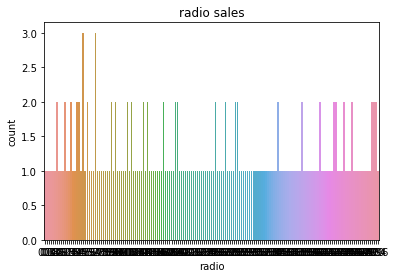

4.1     3
5.7     3
1.5     2
2.6     2
41.7    2
       ..
14.8    1
8.6     1
11.8    1
45.1    1
36.5    1
Name: radio, Length: 167, dtype: int64


In [43]:
plt.subplots(figsize=(6,4))
sns.countplot(x='radio',data=df)
plt.title('radio sales')
plt.show()

print(df.radio.value_counts())

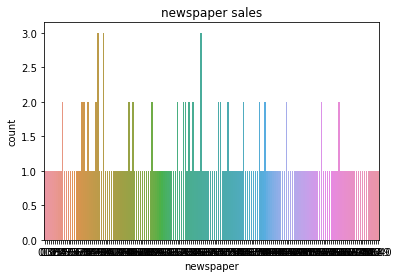

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64


In [44]:
plt.subplots(figsize=(6,4))
sns.countplot(x='newspaper',data=df)
plt.title('newspaper sales')
plt.show()

print(df.newspaper.value_counts())

**bivariate analysis**

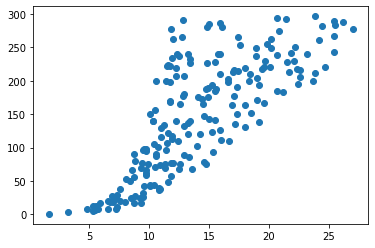

In [45]:
plt.scatter(df['sales'],df['TV'])

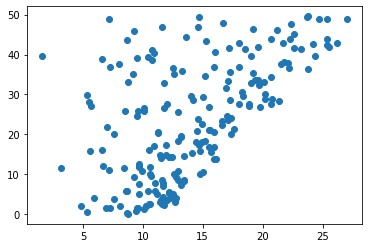

In [46]:
plt.scatter(df['sales'],df['radio'])

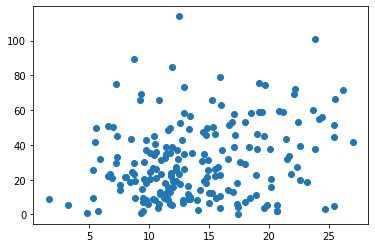

In [47]:
plt.scatter(df['sales'],df['newspaper'])

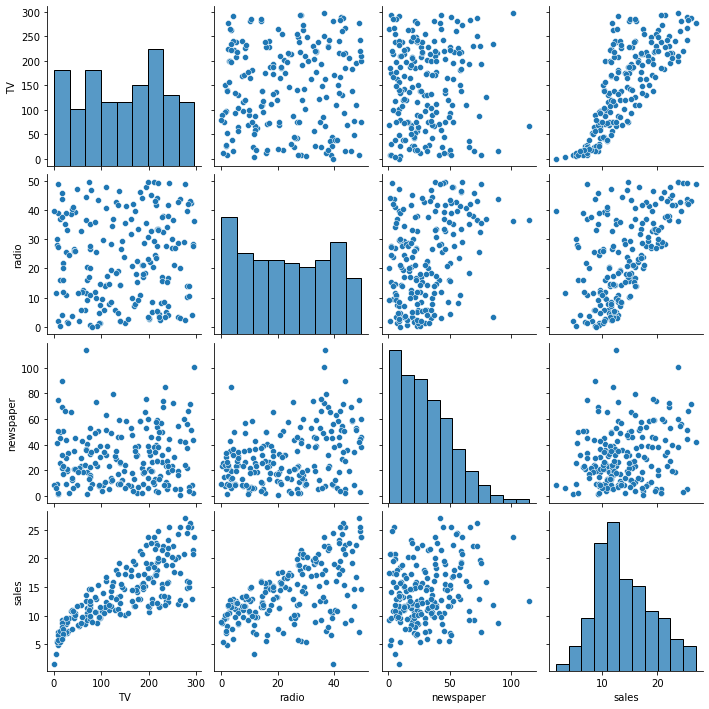

In [48]:
sns.pairplot(df)

In [49]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [50]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [51]:
df_new=df[(z<3).all(axis=1)]

In [52]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [55]:
df=df_new

In [56]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [58]:
#seprating into input and output variables
df_x=df.drop(columns=["sales"])
y=pd.DataFrame(df["sales"])

In [59]:
# scaling the input variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [60]:
#Here we will find out random state value with which our linear model learns maximum
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)        

max r2 score corresponding to  90 is 0.9477136584598765


In [61]:
#Lets use cross val score function to check above is overfitting or not
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score


array([0.87988273, 0.9176965 , 0.92510819, 0.80845813, 0.89565733])

In [62]:
#Lets make out final model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=88,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [64]:
#Lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 1.6451907266648675
r2_score is: 0.8837353565017301
